In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/[1h]BTCUSDT.csv", 
                 parse_dates=['Start', 'Stop'], 
                 date_parser=lambda x: datetime.datetime.fromtimestamp(float(x)/1000))
df.columns = ["start", "stop", "open", "close", "high", "low", "volume"]

In [3]:
df.head()

,start,stop,open,close,high,low,volume
0,2017-08-17 07:00:00,2017-08-17 07:59:59.999,4261.48,4308.83,4261.32,4313.62,47.181009
1,2017-08-17 08:00:00,2017-08-17 08:59:59.999,4308.83,4315.32,4291.37,4328.69,23.234916
2,2017-08-17 09:00:00,2017-08-17 09:59:59.999,4330.29,4324.35,4309.37,4345.45,7.229691
3,2017-08-17 10:00:00,2017-08-17 10:59:59.999,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 11:00:00,2017-08-17 11:59:59.999,4333.32,4360.69,4333.32,4377.85,0.972807


### Autocorrelation test

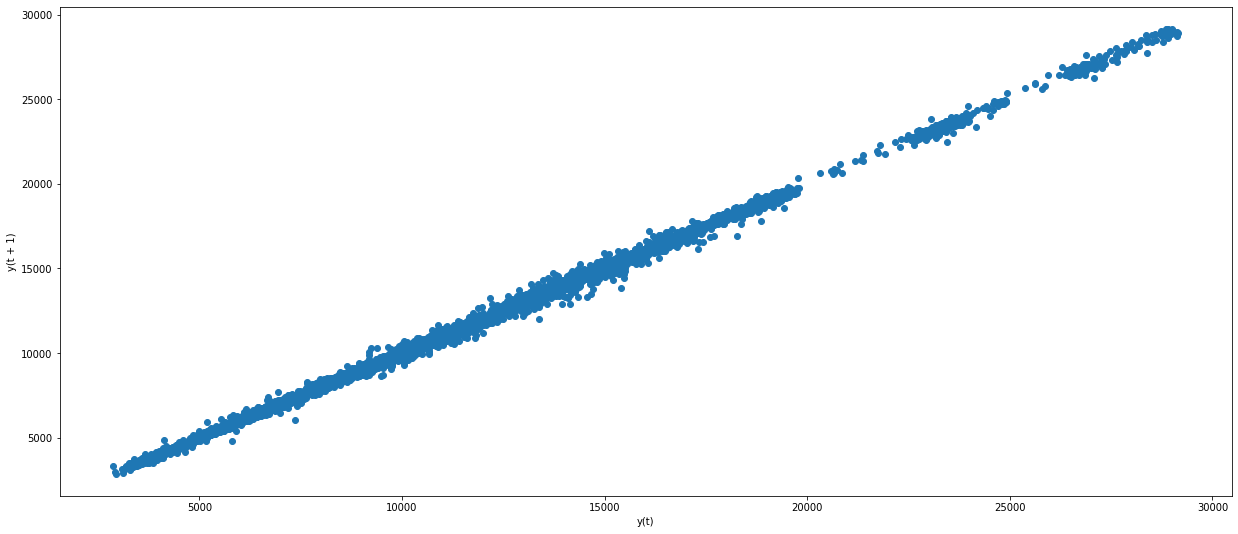

In [4]:
from pandas.plotting import lag_plot

plt.rc("figure", figsize=(21, 9))
lag_plot(df.open)

plt.show()

### PACF and ACF

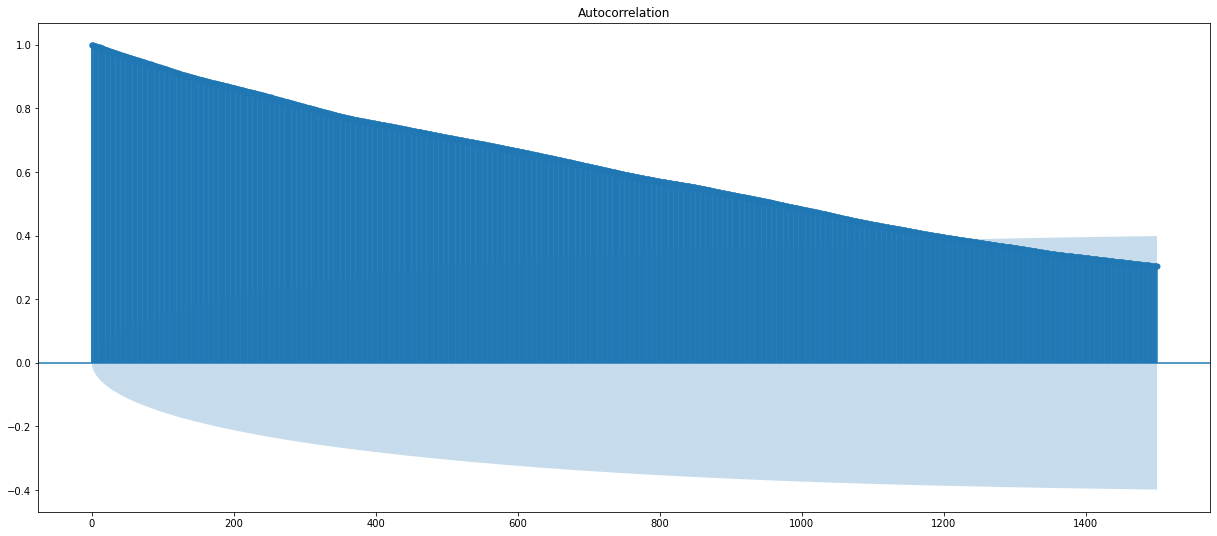

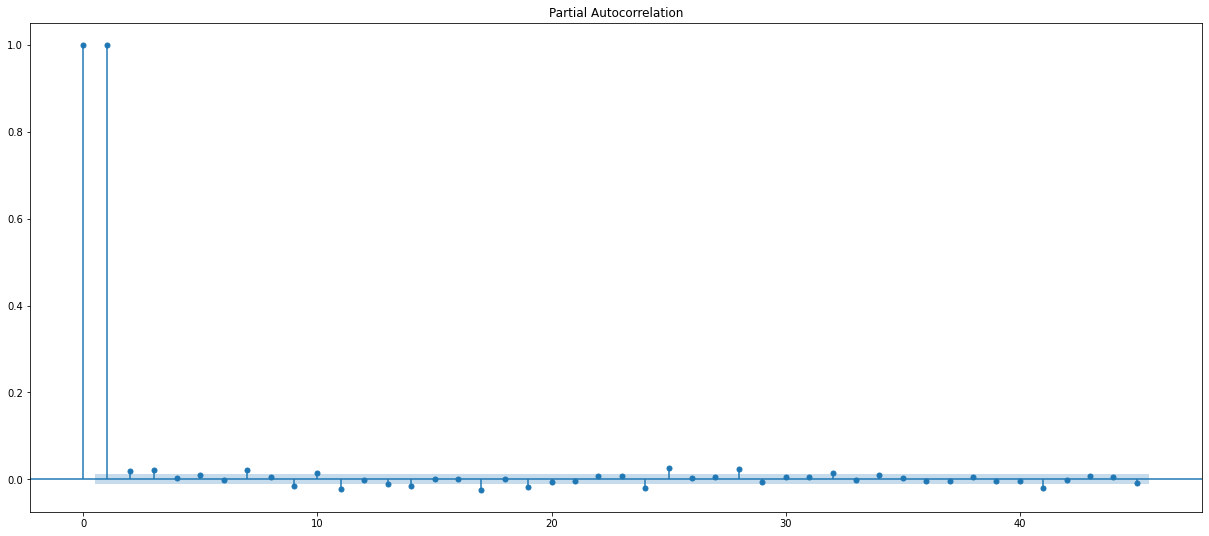

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc("figure", figsize=(21, 9))

plot_acf(df.open, lags=1500)
plt.show()

plot_pacf(df.open)
plt.show()

p = 1250

q = 3

### Autoregression (AR)

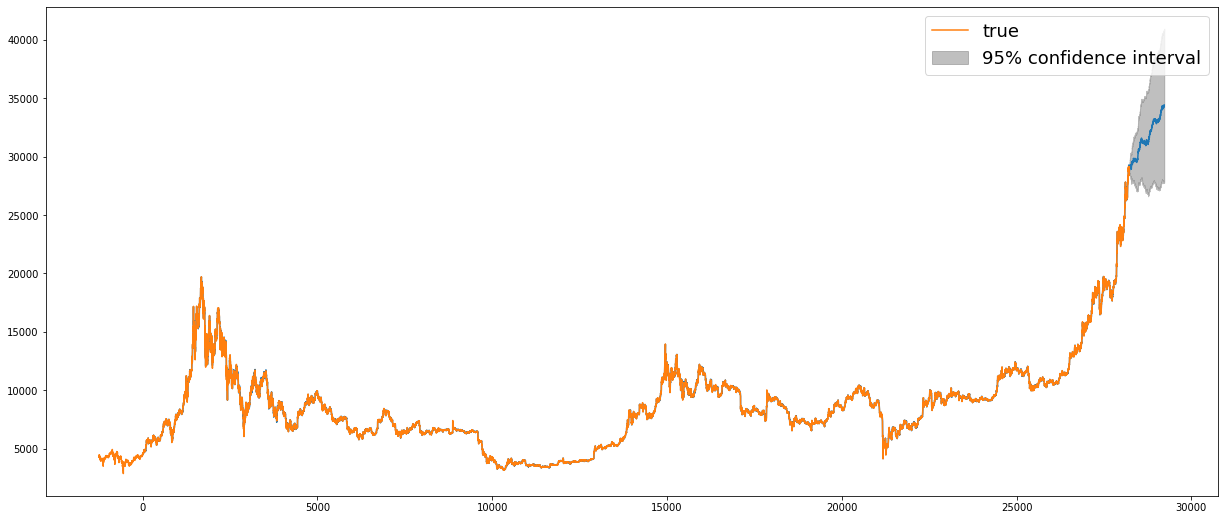

In [6]:
from statsmodels.tsa.ar_model import AutoReg

model_ar = AutoReg(df.open.values, lags=1250, old_names=False).fit()

model_ar.plot_predict(start=0, end=len(df.open.values) + 1000, figsize=(21, 9))
plt.plot(range(-1250, len(df.open)-1250), df.open.values, label="true")

plt.legend(fontsize=18)
plt.show()

### Moving Average (MA)

<Figure size 1512x648 with 0 Axes>

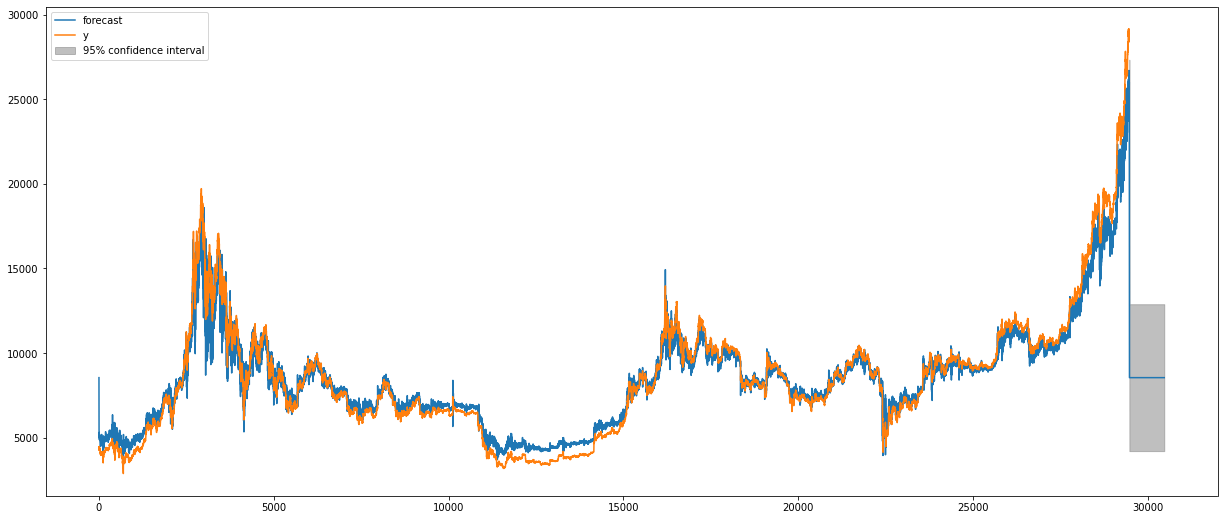

In [7]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_ma = ARIMA(df.open.values, order=(0, 0, 3)).fit()

plt.figure(figsize=(21, 9))

model_ma.plot_predict(start=0, end=len(df.open)+1000)
plt.show()

# 

### SimpleExpSmoothing

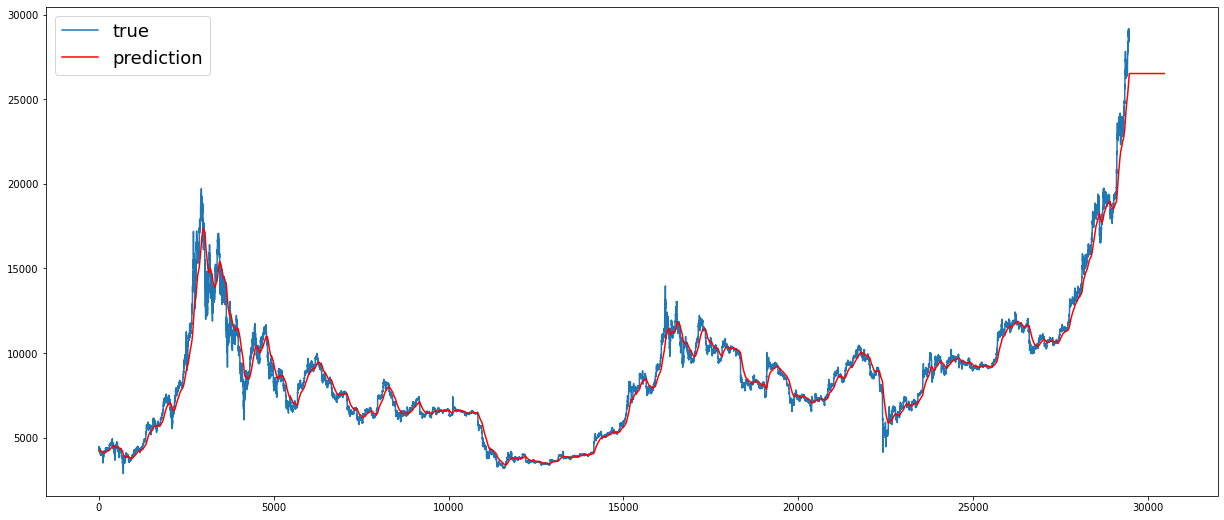

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES

model_ses = SES(df.open, initialization_method="heuristic").fit(smoothing_level=0.01)

predict_ses = model_ses.predict(0, len(df.open)+1000)

plt.figure(figsize=(21, 9))

plt.plot(df.open, label="true")
plt.plot(predict_ses, 'r', label="prediction")

plt.legend(fontsize=18)
plt.show()

# 

### Holt Winter’s Exponential Smoothing 

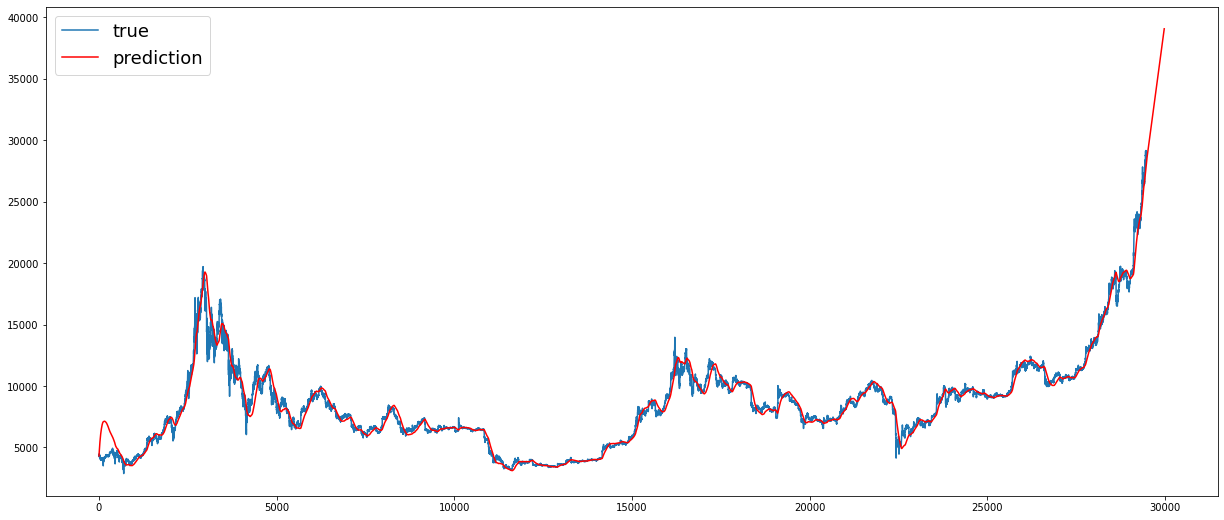

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    model_hwes = ExponentialSmoothing(df.open, trend = 'add').fit(smoothing_level=0.01)

predict_hwes = model_hwes.predict(0, len(df.open) + 500)

plt.figure(figsize=(21, 9))

plt.plot(df.open, label="true")
plt.plot(predict_hwes, 'red', label="prediction")

plt.legend(fontsize=18)
plt.show()